# Vocabulary visualizations per region


This notebook computes visualizations based on UMAP projections of vocabularies.

Notes:
- The vocabularies should be already computed to run this notebook
- If you want to avoid some country from visualizations, just remove it from the `VALIC_CC` list 



In [1]:
using Pkg
Pkg.activate("..")

#VALID_CC = ["AR", "BO", "BR", "CA", "CL", "CO", "CR", "CU", "DO", "EC", "ES", "FR", "GB", "GQ", "GT", "HN", "MX", "NI", "PA", "PE", "PR", "PY", "SV", "US", "UY", "VE"]
VALID_CC = ["AR", "BO", "CA", "CL", "CO", "CR", "DO", "EC", "ES", "FR", "GB", "GT", "HN", "MX", "NI", "PA", "PE", "PY", "SV", "US", "UY", "VE"]
vocpath = "../data/SpanishLang/voc"
DATA = "../data/SpanishLang/"

using Plots, StatsBase, JLD2, CSV, DataFrames, LinearAlgebra, TextSearch, Formatting, Latexify,
    SimilaritySearch, SimSearchManifoldLearning

  Activating project at `~/Research/regional-spanish-models`


paper visualizations use jld2 files instead of .tsv.gz files; however, using jld2 needs to decompres files before running the cells.

In [2]:
V = Dict{String,Dict{UInt64,Float64}}()
F = Dict()

for cc in VALID_CC
    filename = joinpath(vocpath, cc * ".tsv.gz")
    #D_ = CSV.read(filename, DataFrame, delim='\t')
    #M = load(filename, "model")
    M = CSV.read(filename, DataFrame)
    trainsize_ = maximum(M.ndocs)
    ### V[cc] = Dict{UInt64,Float64}(hash(t) => w for (t, w) in zip(token(M), ndocs(M)))
    #V[cc] = Dict(hash(t) => n / trainsize(M) for (t, n) in zip(token(M), ndocs(M)) if 5 <= n)
    #F[cc] = Dict(t => n for (t, n) in zip(token(M), ndocs(M)))
    V[cc] = Dict(hash(t) => n / trainsize_ for (t, n) in zip(M.token, M.ndocs) if 5 <= n)
    F[cc] = Dict(t => n for (t, n) in zip(M.token, M.ndocs))
end

for (cc, X) in sort!(collect(V), by=first)
    println(cc => length(X))
end

"AR" => 669745
"BO" => 46655
"CA" => 62645
"CL" => 281290
"CO" => 322982
"CR" => 102446
"DO" => 108063
"EC" => 146726
"ES" => 567617
"FR" => 69216
"GB" => 81686
"GT" => 94744
"HN" => 60193
"MX" => 435915
"NI" => 68230
"PA" => 111065
"PE" => 177080
"PY" => 123447
"SV" => 73407
"US" => 290631
"UY" => 199000
"VE" => 270561


# top-20 most popular tokens by region

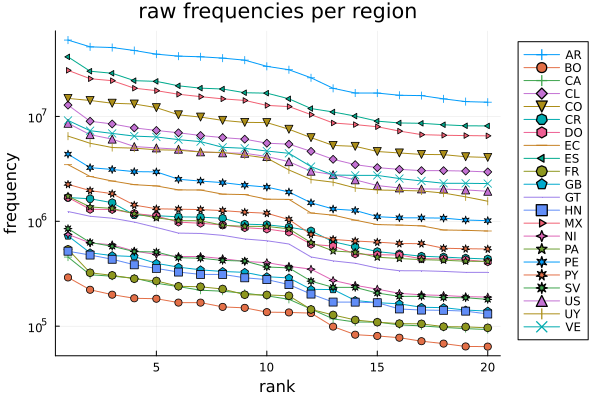

| region |    1 |    2 |    3 |    4 |   5 |   6 |   7 |   8 |   9 |  10 |  11 |    12 |    13 |  14 |    15 |    16 |  17 |    18 |    19 |   20 |
| ------:| ----:| ----:| ----:| ----:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| -----:| -----:| ---:| -----:| -----:| ---:| -----:| -----:| ----:|
|     AR |  que | _usr |   de |    , |   a |   y |  la |  no |  me |  el |   . |    en |    se |  lo |    es |    un | con |    mi |     0 |   te |
|     BO | _usr |   de |  que |    . |   , |  la |   y |  el |   a |  en |  no | _htag |    es | los |    se |   por |  un |     0 |   con |   lo |
|     CA | _usr |  que |   de |    . |   , |   y |  la |   a |  no |  el |  en |    es |    se | los |    me |    lo |  un |   por |     0 |  con |
|     CL | _usr |   de |  que |    , |  la |   y |   . |   a |  el |  no |  en | _htag |    es |  se |   los |    me |  un |    .. |   con |  por |
|     CO | _usr |  que |   de |    . |   , |   y |  la |   a |  no |  el |  en |    es |    me |  se |   por |    lo | los |   con | _htag |   un |
|     CR | _usr |  que |   de |    , |   y |   . |   a |  la |  no |  el |  en |    me |    es |  se |    un |     0 |  lo |   con |   por |   mi |
|     DO | _usr |  que |   de |    . |   , |   y |  la |  el |   a |  en |  no |    es | _htag |  se |   los |     0 | por |    un |    lo |  con |
|     EC | _usr |   de |  que |    . |   , |  la |   y |   a |  el |  en |  no |    es | _htag |  se |   los |     0 | por |   con |    lo |   un |
|     ES | _usr |  que |   de |    , |   . |   y |   a |  la |  no |  el |  en |    es |    me |  lo |    se |    un |   0 |   por | _htag |  los |
|     FR | _usr |   de |  que |    . |   , |   y |  la |   a |  no |  en |  el |    es |    me |  un |     0 |    se |  lo |   los | _htag |  por |
|     GB | _usr |  que |   de |    . |   , |   y |   a |  la |  no |  el |  en |    me |    es |  lo |    un |    se |   0 |   por |   los |  con |
|     GT | _usr |  que |   de |    . |   , |   y |  la |   a |  no |  el |  en |    es |    me |  se | _htag |    lo | por |    .. |   los |    0 |
|     HN | _usr |  que |   de |    . |   , |   y |  la |   a |  el |  no |  en |    es | _htag |  me |    se |     0 |  lo |   por |   los |  con |
|     MX | _usr |  que |   de |    , |   . |   y |   a |  la |  no |  el |  en |    me | _htag |  es |    se |   por |  mi |    un |   con |    0 |
|     NI |  que |   de | _usr |    , |   a |   y |  la |  no |   . |  me |  el |    en |    es |  se |    mi | _htag |  lo |     0 |   por |  con |
|     PA | _usr |   de |  que |    . |   y |  la |   , |   a |  el |  no |  en |    es |    se | los |    me |    lo |   0 |   por |   con |   un |
|     PE | _usr |   de |  que |    , |   . |   y |  la |   a |  no |  el |  en |    es | _htag |  se |    me |   los | por |    lo |   con |    0 |
|     PY | _usr |  que |   de |    , |   a |   y |  la |   . |  no |  el |  en |    es |    se |  me | _htag |   por |   0 |    un |    lo |  con |
|     SV | _usr |   de |  que |    , |   . |  la |   y |  el |   a |  no |  en |    es |   los |  se |   por |     0 |  lo | _htag |   con |   un |
|     US | _usr |  que |   de |    . |   y |   , |   a |  la |  no |  el |  en |    me |    es |  se |    lo |   los |  un |   por |     0 |  con |
|     UY |  que |   de |    , | _usr |   y |   a |  la |  no |  me |  el |  en |     . |    se |  es |    lo |    un | con |     0 |   los | jaja |
|     VE | _usr |   de |  que |    . |   , |   y |  la |   a |  el |  no |  en |    es |    se | los |     0 | _htag | por |   con |    lo |   me |


In [3]:
k = 20
display("text/markdown", """# top-$k most popular tokens by region""")
plot()
table = Matrix{String}(undef, length(VALID_CC) + 1, k+1)
header = ["region"]
for i in 1:k
    push!(header, string(i))
end

table[1, :] .= header
for (i, cc) in enumerate(VALID_CC)
    voc = collect(F[cc])
    sort!(voc, by=p -> p[end], rev=true)
    resize!(voc, k)
    # display("text/markdown", "$cc: " * join(first.(voc), ", "))
    table[i+1, 1] = cc
    table[i+1, 2:end] .= first.(voc)
    plot!(last.(voc), label=cc, m=:auto)
    #display("text/markdown", "    freqs: " * join(format.(Int.(last.(voc)), autoscale=:metric, precision=1), ", "))
end
# display(latexify(table))

plot!(title="raw frequencies per region", yscale=:log10, ylabel="frequency", xlabel="rank", legend=:outertopright, fmt=:png) |> display
display("text/markdown", latexify(table, latex=false, env=:mdtable))

In [4]:
n = length(VALID_CC)
A = Matrix{Float64}(undef, n, n)
dist = CosineDistance()
@time for (i, cc) in enumerate(VALID_CC)
    u = V[cc]
    A[i, i] = 0.0
    for j in i+1:n
        v = V[VALID_CC[j]]
        A[j, i] = A[i, j] = evaluate(dist, u, v)        
    end
end

A

  1.583894 seconds (67.73 k allocations: 3.413 MiB, 3.89% compilation time)


22×22 Matrix{Float64}:
 0.0         0.0519814   0.0363345   …  0.0221266   0.00382391  0.0342409
 0.0519814   0.0         0.0132705      0.0191423   0.0651191   0.00945421
 0.0363345   0.0132705   0.0            0.00460599  0.0498169   0.00690248
 0.037364    0.00729325  0.00883185     0.011771    0.0490817   0.00935022
 0.0251519   0.0169255   0.00917114     0.00867117  0.0362628   0.00670256
 0.0173834   0.0275545   0.0158588   …  0.00878654  0.0244304   0.0179643
 0.0422174   0.00725621  0.00727385     0.0100182   0.0539256   0.00468236
 0.0382179   0.00570844  0.00624027     0.00946141  0.0502273   0.00410717
 0.0304233   0.0149991   0.00445219     0.00532479  0.0423539   0.00895874
 0.0460202   0.0173153   0.00456676     0.00952673  0.0614349   0.0138929
 0.0340392   0.0200696   0.00298368  …  0.00525343  0.0478418   0.0117099
 0.0252769   0.0150599   0.00738316     0.00623858  0.0378475   0.00808417
 0.0258271   0.0141707   0.00843742     0.00616784  0.0371637   0.00845043
 0.022

In [5]:
function creatergb!(C)
    for i in (1, 2, 3)
        v = @view C[i, :]
        #s = 4 * std(v)
        min_, max_ = extrema(v)
        #v .= v ./ s .+ 0.5

        for j in eachindex(v)
            x = (v[j] - min_) / (max_ - min_)
            #x = v[j]
            v[j] = clamp(x, 0.05, 0.95)
        end
    end

    [RGB(c...) for c in eachcol(C)]
end

creatergb! (generic function with 1 method)

## UMAP projections

The UMAP projection uses the affinity matrix computed above. The following cell contains the hyperparameters and code to compute it. Note that here $k$ is in fact $k-1$ since self-reference is not removed while computing the nn graph. For instance, when we give $k=4$ we will obtain a projection induced by the $3$nn graph.


It is worth to mention that UMAP projections will change since it is based on an stochastic procedure. You will find that it is quite stable locally inside clusters, but clusters tend to rotate.

┌ Info: ======= k=4 =====
└ @ Main In[6]:9


  0.038123 seconds (159.42 k allocations: 7.674 MiB, 99.47% compilation time)


*** computing graph
*** layout embedding SpectralLayout
*** fit ab / embedding
*** opt embedding

  0.000008 seconds (3 allocations: 976 bytes)



UMAP construction time cost report:
- fuzzy graph: 0.159075335
- embedding init: 1.136358746
- embedding opt: 0.005454804

*** computing graph
*** layout embedding SpectralLayout
*** fit ab / embedding
*** opt embedding
UMAP construction time cost report:
- fuzzy graph: 3.4241e-5
- embedding init: 0.000397119
- embedding opt: 0.012800277



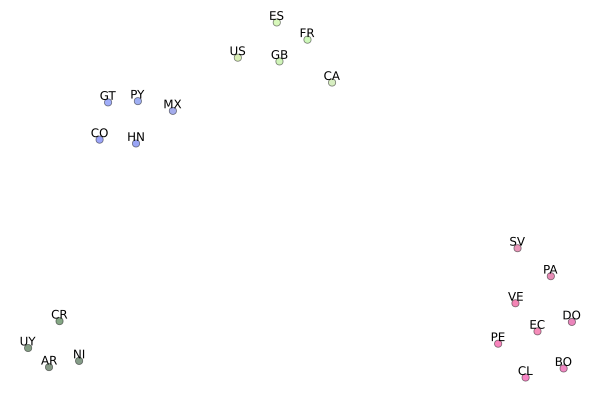

  0.000211 seconds (3 allocations: 1.297 KiB)
  0.000006 seconds (3 allocations: 1.297 KiB)


┌ Info: ======= k=6 =====
└ @ Main In[6]:9
*** computing graph
*** layout embedding SpectralLayout
*** fit ab / embedding
*** opt embedding
UMAP construction time cost report:
- fuzzy graph: 4.6191e-5
- embedding init: 0.000312498
- embedding opt: 0.016598893

*** computing graph
*** layout embedding SpectralLayout
*** fit ab / embedding
*** opt embedding
UMAP construction time cost report:
- fuzzy graph: 3.0527e-5
- embedding init: 0.000265358
- embedding opt: 0.017109934



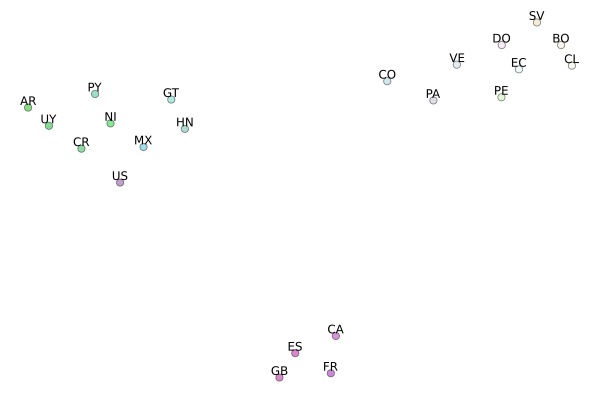

  0.000221 seconds (3 allocations: 1.672 KiB)


┌ Info: ======= k=8 =====
└ @ Main In[6]:9
*** computing graph
*** layout embedding SpectralLayout
*** fit ab / embedding
*** opt embedding


  0.000024 seconds (3 allocations: 1.672 KiB)


UMAP construction time cost report:
- fuzzy graph: 4.4066e-5
- embedding init: 0.000299975
- embedding opt: 0.020764137

*** computing graph
*** layout embedding SpectralLayout
*** fit ab / embedding
*** opt embedding
UMAP construction time cost report:
- fuzzy graph: 5.7447e-5
- embedding init: 0.000378511
- embedding opt: 0.026172717



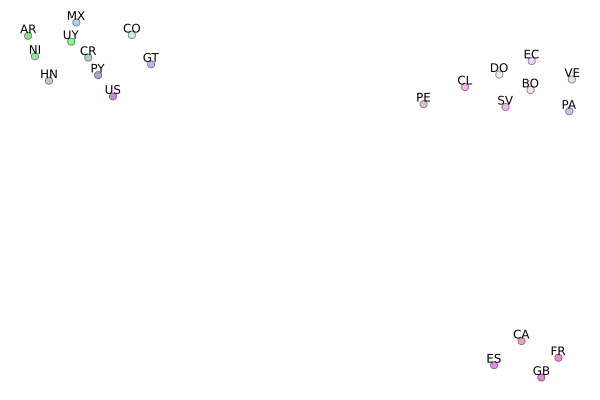

  0.000213 seconds (5 allocations: 2.391 KiB)


┌ Info: ======= k=10 =====
└ @ Main In[6]:9
*** computing graph
*** layout embedding SpectralLayout
*** fit ab / embedding
*** opt embedding


  0.000006 seconds (3 allocations: 2.047 KiB)


UMAP construction time cost report:
- fuzzy graph: 5.5795e-5
- embedding init: 0.000288904
- embedding opt: 0.027047756

*** computing graph
*** layout embedding SpectralLayout
*** fit ab / embedding
*** opt embedding
UMAP construction time cost report:
- fuzzy graph: 4.3675e-5
- embedding init: 0.000253992
- embedding opt: 0.005984016



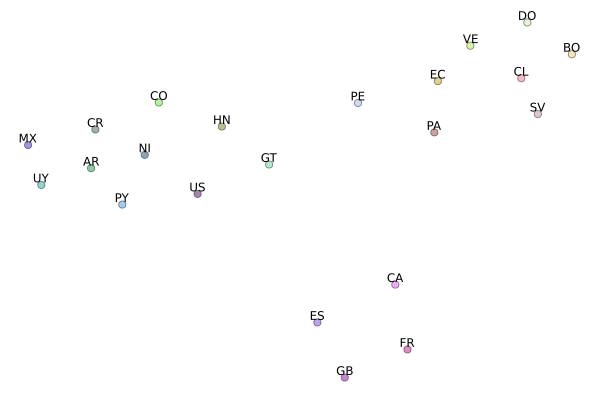

  0.000272 seconds (3 allocations: 2.359 KiB)
  0.000008 seconds (3 allocations: 2.359 KiB)


┌ Info: ======= k=12 =====
└ @ Main In[6]:9
*** computing graph
*** layout embedding SpectralLayout
*** fit ab / embedding
*** opt embedding
UMAP construction time cost report:
- fuzzy graph: 5.4538e-5
- embedding init: 0.000283642
- embedding opt: 0.008946584

*** computing graph
*** layout embedding SpectralLayout
*** fit ab / embedding
*** opt embedding
UMAP construction time cost report:
- fuzzy graph: 4.8987e-5
- embedding init: 0.000219526
- embedding opt: 0.008599268



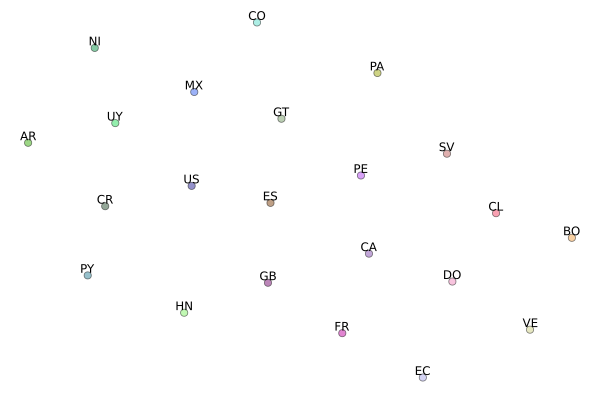

In [6]:
min_dist = 0.2
neg_sample_rate = 5
local_connectivity = 1
n_epochs = 300
layout = SpectralLayout()
tol = 1e-5

for k in 4:2:12
    @info "======= k=$k ====="
    #I = ExhaustiveSearch(db=MatrixDatabase(A), dist=L2Distance())
    I = PrecomputedAffinityMatrix(A)
    E = fit(UMAP, I; maxoutdim=2, k, min_dist, layout, n_epochs, neg_sample_rate, local_connectivity, tol)
    X = predict(E)
    E = fit(UMAP, I; maxoutdim=3, k, min_dist, layout, n_epochs, neg_sample_rate, local_connectivity, tol)
    C = creatergb!(predict(E))
    #X = predict(fit(E, 2; n_epochs, tol, neg_sample_rate))
    
    scatter(X[1, :], X[2, :], c=C, label="", series_annotations=text.(VALID_CC, :bottom, 8),
        xticks=nothing, yticks=nothing, xaxis=false, yaxis=false,
        ms=4, ma=0.5, la=0.5, alpha=0.5)
    savefig("../figs/fig-lexical-umap-$k.pdf")
    savefig("../figs/fig-lexical-umap-$k.png")
    plot!(fmt=:png) |> display
    
    open(joinpath(DATA, "colormap-lexical-$k.csv"), "w") do f
        println(f, "country,R,G,B")
        for (i, (cc, c)) in enumerate(zip(VALID_CC, C))
            println(f, cc, ",", c.r, ",", c.g, ",", c.b)
        end
    end
end


# Spanish language vocabulary visualization (UMAP) per region

2d and 3d projections, for spatial distribution and 3d to color distributions, respectively.
It computes UMAP using 3NN and cosine distance with raw vocabularies/emojis.



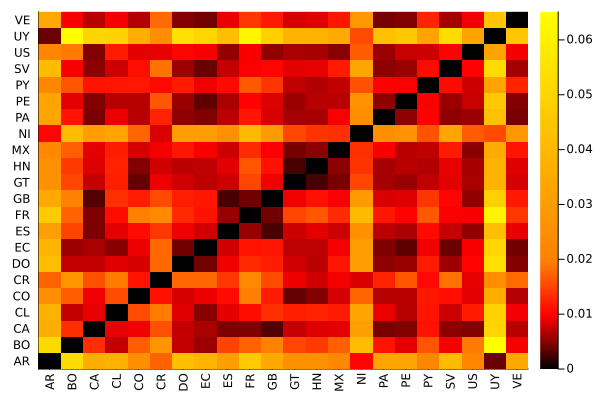

In [7]:
heatmap(VALID_CC, VALID_CC, A, ticks = :all, xrot=90, c=cgrad([:black, :red, :yellow], [0.07, 0.15, 0.3]))
#heatmap(VALID_CC, VALID_CC, A, ticks=:all, xrot=90)
savefig("../figs/fig-lexical-affinity-matrix.pdf")
savefig("../figs/fig-lexical-affinity-matrix.png")
plot!(fmt=:png)